# Cleaning Modes With Rational Filters

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [19]:
import matplotlib.pyplot as pl
import numpy as np
import qnm_filter
from gwpy.timeseries import TimeSeries
import copy

In [20]:
SSB_peak_time = 1126259461.9987423
theoretical_values = (68.6, 0.71)
mass_unit = qnm_filter.Filter.mass_unit(68.6)

Recall that 220, 220+221, 220+221+210 do not have time in mass units and do not have the values as errors

In [21]:
def epsilon_calc(mass_err, chi_err, mass_theoretical, chi_theoretical):
    temp0 = chi_err**2
    temp1 = (mass_err/mass_theoretical)**2
    return np.sqrt(temp0+temp1)

## 220

In [22]:
data220 = np.loadtxt('./Cluster_results/combined_220.txt')
time220 = (data220[:,0] - SSB_peak_time)/mass_unit
evidence220 = data220[:,1]
average_mass220 = data220[:,2] - theoretical_values[0]
average_chi220 = data220[:,3] - theoretical_values[1]
MAP_mass220 = data220[:,4] - theoretical_values[0]
MAP_chi220 = data220[:,5] - theoretical_values[1]

average_epsilon220 = epsilon_calc(average_mass220, average_chi220, theoretical_values[0], theoretical_values[1])
MAP_epsilon220 = epsilon_calc(MAP_mass220, MAP_chi220, theoretical_values[0], theoretical_values[1])

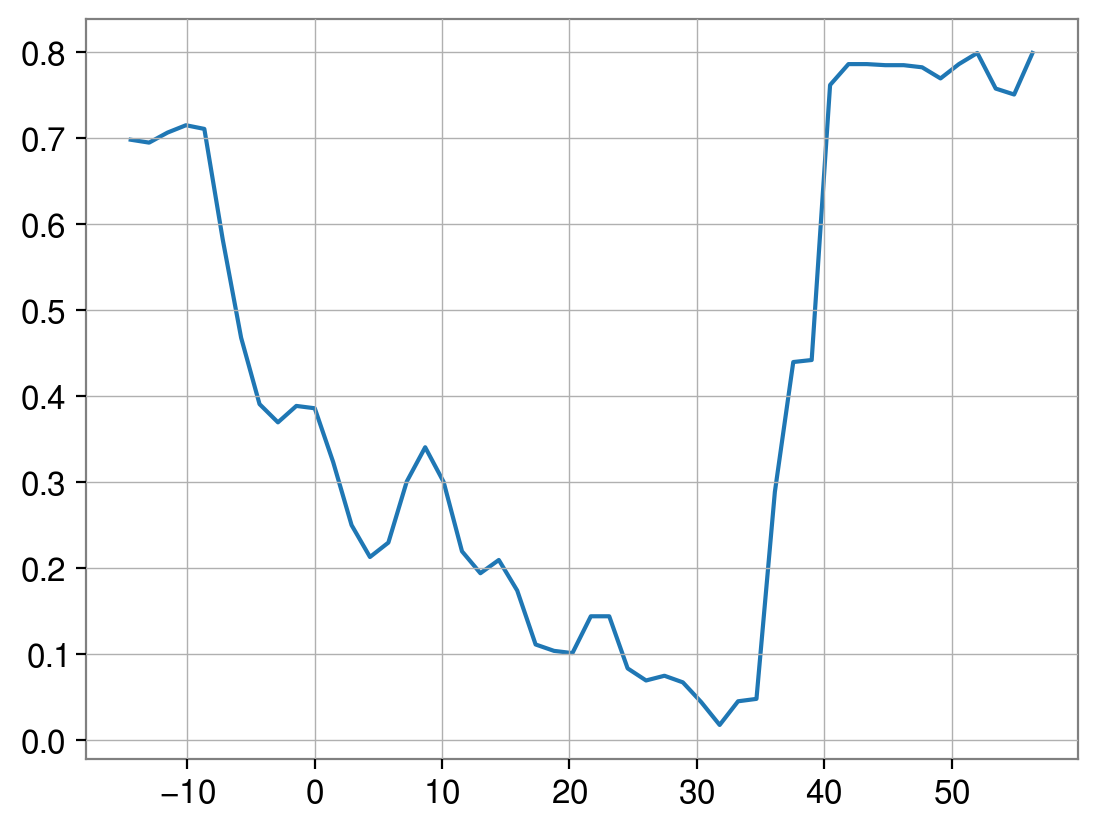

In [23]:
pl.plot(time220, MAP_epsilon220)

## 220+221

In [24]:
data220_221 = np.loadtxt('./Cluster_results/combined_220+221.txt')
time220_221 = (data220_221[:,0] - SSB_peak_time)/mass_unit
evidence220_221 = data220_221[:,1]
average_mass220_221 = data220_221[:,2] - theoretical_values[0]
average_chi220_221 = data220_221[:,3] - theoretical_values[1]
MAP_mass220_221 = data220_221[:,4] - theoretical_values[0]
MAP_chi220_221 = data220_221[:,5] - theoretical_values[1]

average_epsilon220_221 = epsilon_calc(average_mass220_221, average_chi220_221, theoretical_values[0], theoretical_values[1])
MAP_epsilon220_221 = epsilon_calc(MAP_mass220_221, MAP_chi220_221, theoretical_values[0], theoretical_values[1])

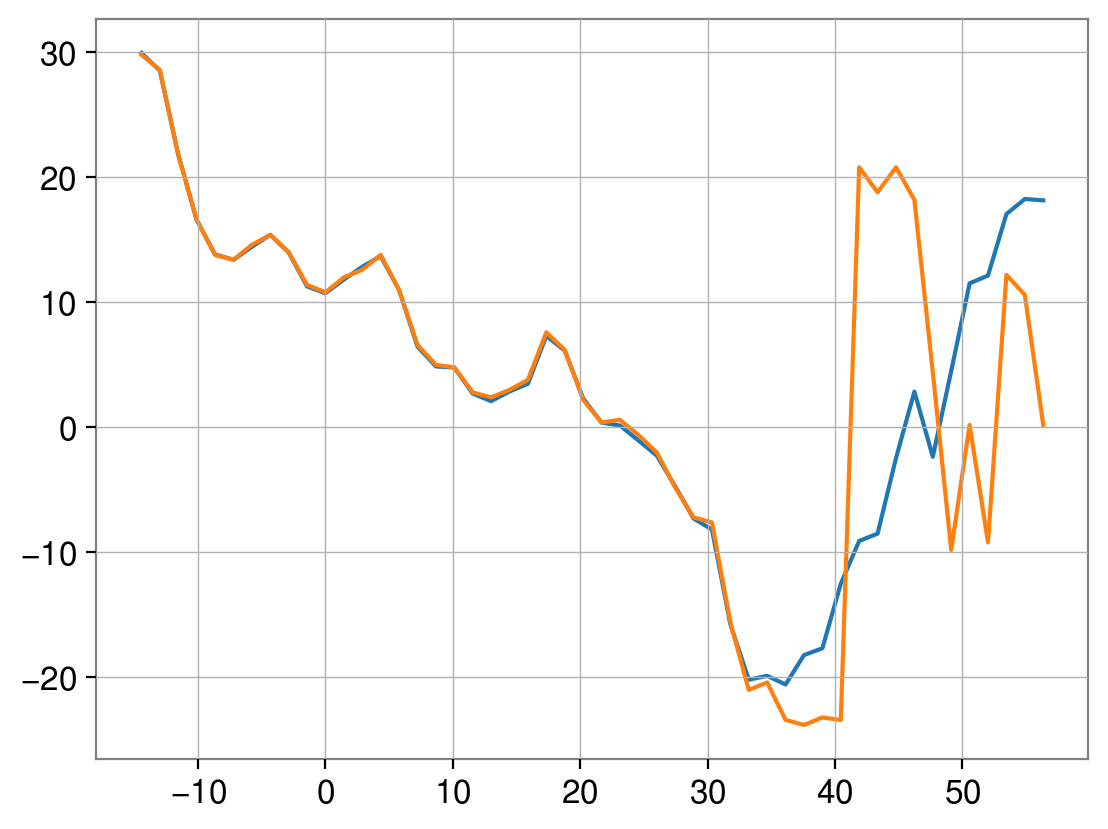

In [25]:
pl.plot(time220, average_mass220_221)
pl.plot(time220, MAP_mass220_221)

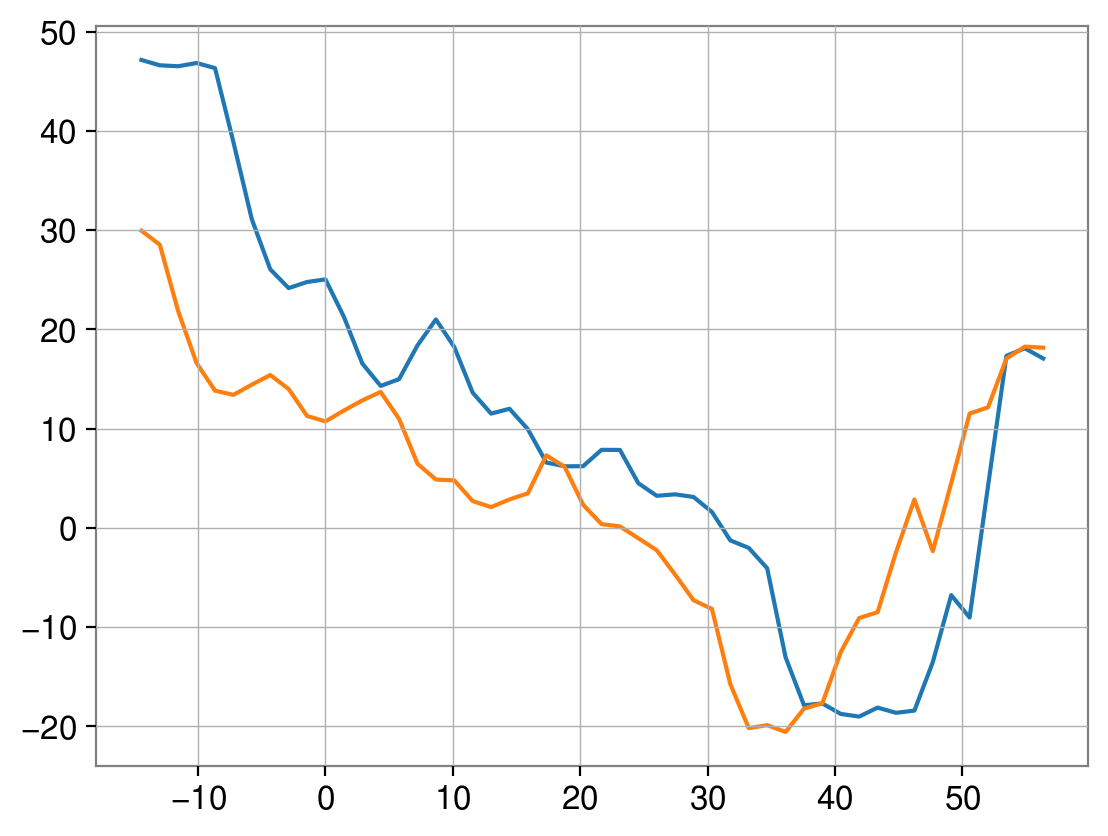

In [26]:
pl.plot(time220, average_mass220)
pl.plot(time220, average_mass220_221)

Text(0, 0.5, 'MAP $\\epsilon$')

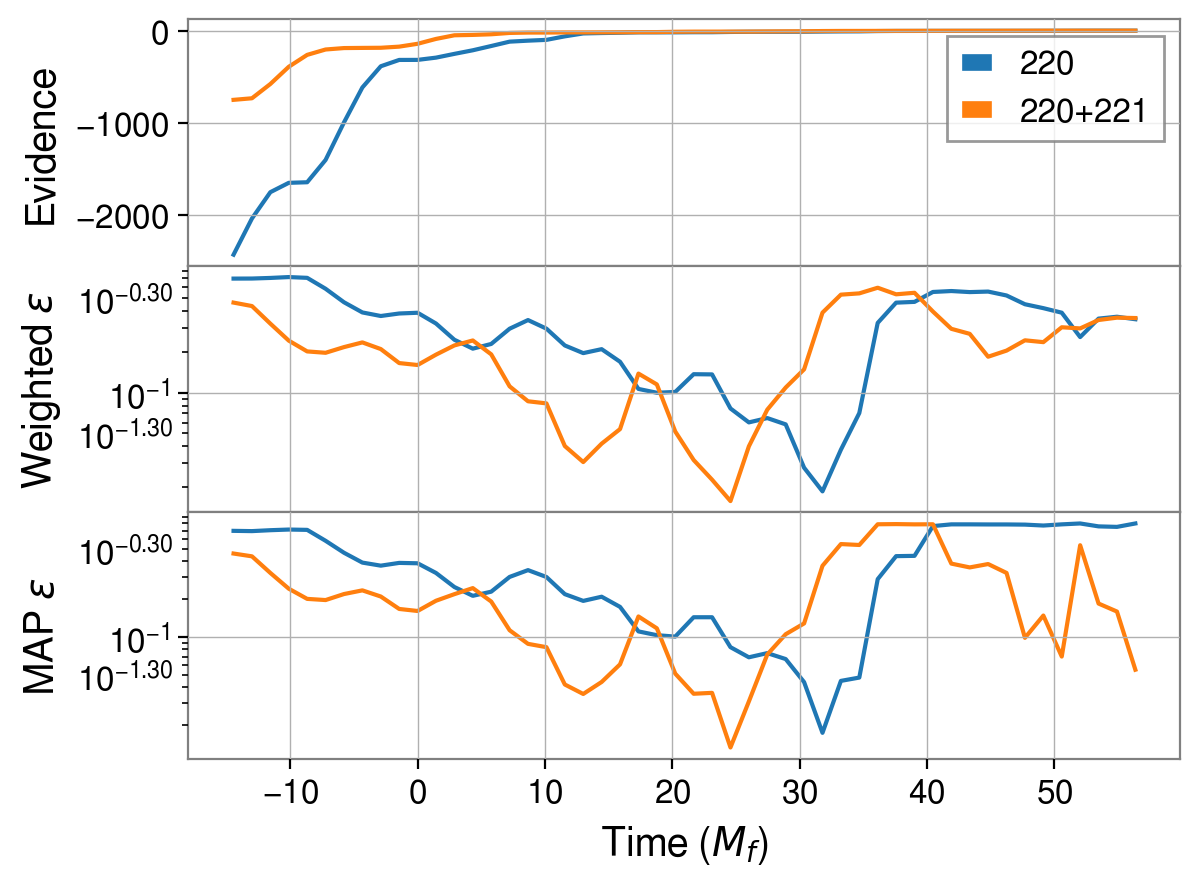

In [27]:
plt, axs = pl.subplots(3, sharex = True)
plt.subplots_adjust(hspace=0)

axs[0].plot(time220, evidence220, label = "220")
axs[0].plot(time220_221, evidence220_221, label = "220+221")
axs[0].set_ylabel("Evidence")
axs[0].legend()
# axs[0].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[0].axvline(t_intersect[1], c = 'r', ls = '--')
# axs[0].set_xlim(0, 40)

axs[1].semilogy(time220, average_epsilon220)
axs[1].semilogy(time220_221, average_epsilon220_221)
# axs[1].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[1].axvline(t_intersect[1], c = 'r', ls = '--')
axs[1].set_ylabel(r'Weighted $\epsilon$')

axs[2].semilogy(time220, MAP_epsilon220)
axs[2].semilogy(time220_221, MAP_epsilon220_221)
# axs[2].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[2].axvline(t_intersect[1], c = 'r', ls = '--')
axs[2].set_xlabel(r'Time ($M_f$)')
axs[2].set_ylabel(r'MAP $\epsilon$')

## 220+221+210

In [28]:
data220_221_210 = np.loadtxt('./Cluster_results/combined_220+221+210.txt')
time220_221_210 = (data220_221_210[:,0] - SSB_peak_time)/mass_unit
evidence220_221_210 = data220_221_210[:,1]
average_mass220_221_210 = data220_221_210[:,2] - theoretical_values[0]
average_chi220_221_210 = data220_221_210[:,3] - theoretical_values[1]
MAP_mass220_221_210 = data220_221_210[:,4] - theoretical_values[0]
MAP_chi220_221_210 = data220_221_210[:,5] - theoretical_values[1]

average_epsilon220_221_210 = epsilon_calc(average_mass220_221_210, average_chi220_221_210, theoretical_values[0], theoretical_values[1])
MAP_epsilon220_221_210 = epsilon_calc(MAP_mass220_221_210, MAP_chi220_221_210, theoretical_values[0], theoretical_values[1])

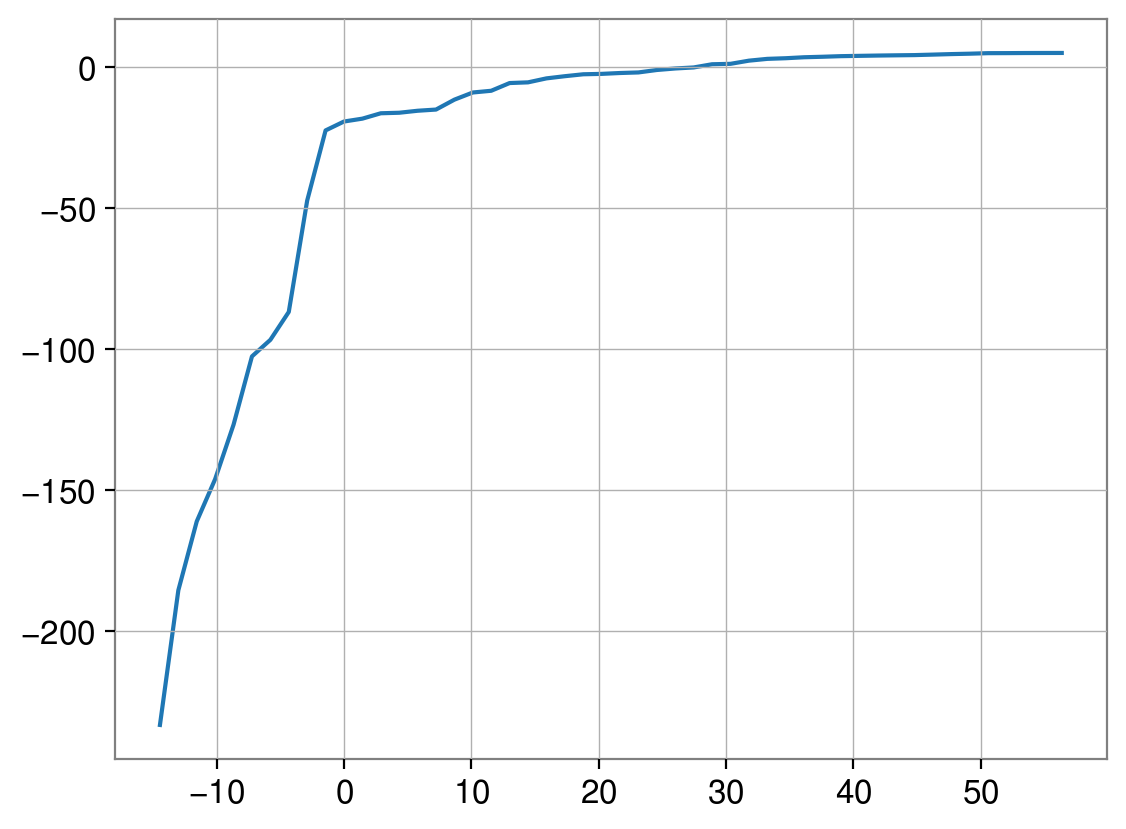

In [29]:
# pl.plot(time220, evidence220)
# pl.plot(time220, evidence220_221)
pl.plot(time220_221_210, evidence220_221_210)

Text(0, 0.5, 'MAP $\\epsilon$')

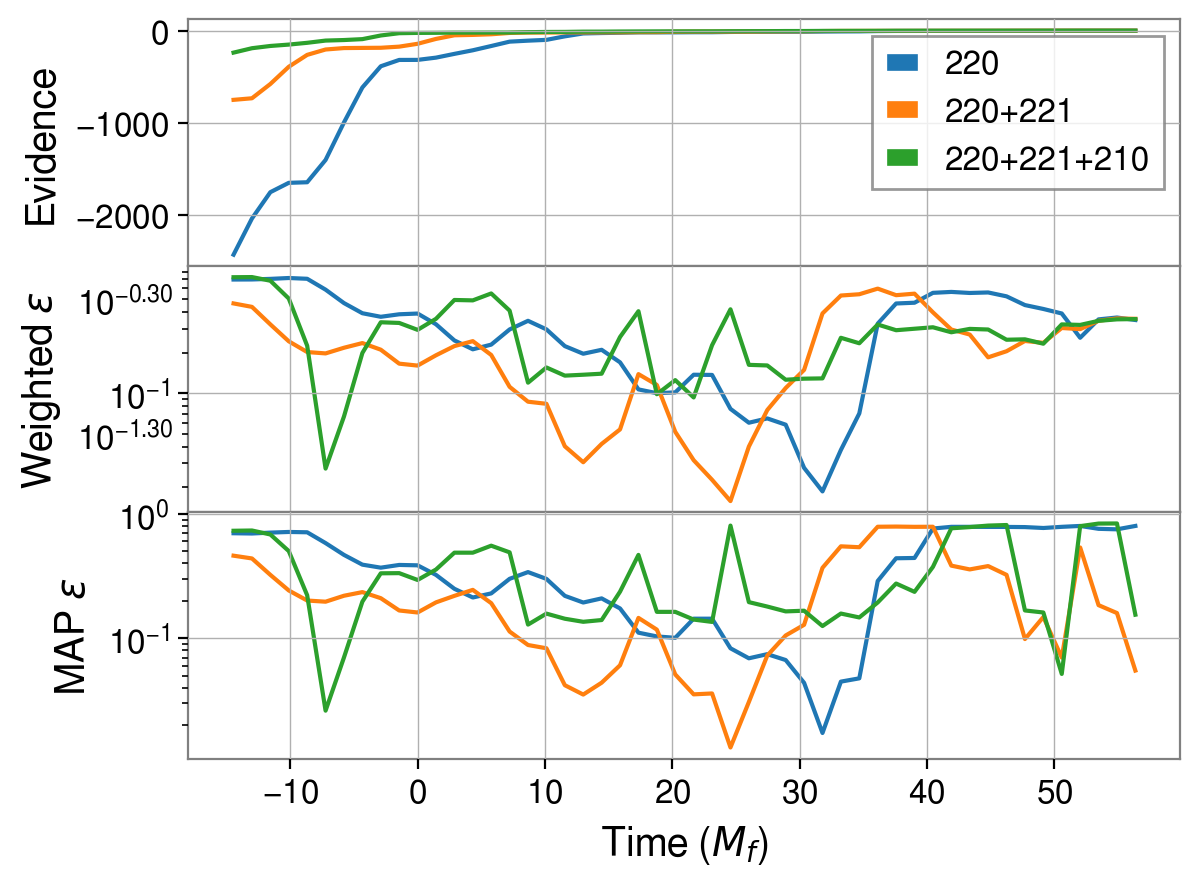

In [30]:
plt, axs = pl.subplots(3, sharex = True)
plt.subplots_adjust(hspace=0)

axs[0].plot(time220, evidence220, label = "220")
axs[0].plot(time220_221, evidence220_221, label = "220+221")
axs[0].plot(time220_221_210, evidence220_221_210, label = "220+221+210")
axs[0].set_ylabel("Evidence")
axs[0].legend()
# axs[0].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[0].axvline(t_intersect[1], c = 'r', ls = '--')
# axs[0].set_xlim(0, 40)

axs[1].semilogy(time220, average_epsilon220)
axs[1].semilogy(time220_221, average_epsilon220_221)
axs[1].semilogy(time220_221_210, average_epsilon220_221_210)
# axs[1].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[1].axvline(t_intersect[1], c = 'r', ls = '--')
axs[1].set_ylabel(r'Weighted $\epsilon$')

axs[2].semilogy(time220, MAP_epsilon220)
axs[2].semilogy(time220_221, MAP_epsilon220_221)
axs[2].semilogy(time220_221_210, MAP_epsilon220_221_210)
# axs[2].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[2].axvline(t_intersect[1], c = 'r', ls = '--')
axs[2].set_xlabel(r'Time ($M_f$)')
axs[2].set_ylabel(r'MAP $\epsilon$')

## 220+440

In [31]:
data220_440 = np.loadtxt('./Cluster_results/combined_220+440.txt')
time220_440 = (data220_440[:,0] - SSB_peak_time)/mass_unit
evidence220_440 = data220_440[:,1]
average_mass220_440 = data220_440[:,2] - theoretical_values[0]
average_chi220_440 = data220_440[:,3] - theoretical_values[1]
MAP_mass220_440 = data220_440[:,4] - theoretical_values[0]
MAP_chi220_440 = data220_440[:,5] - theoretical_values[1]

average_epsilon220_440 = epsilon_calc(average_mass220_440, average_chi220_440, theoretical_values[0], theoretical_values[1])
MAP_epsilon220_440 = epsilon_calc(MAP_mass220_440, MAP_chi220_440, theoretical_values[0], theoretical_values[1])

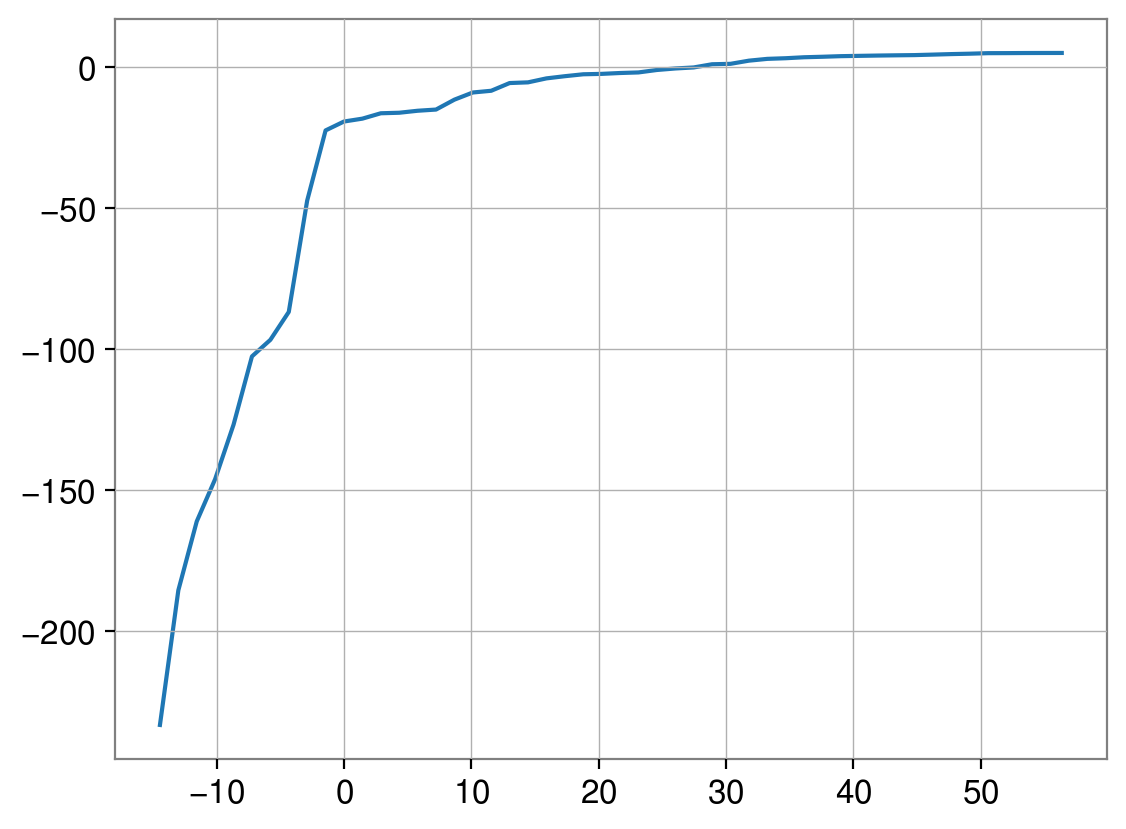

In [32]:
pl.plot(time220_440, evidence220_440)

## From here time becomes already in units of time and values already as error

## 220+221+440

In [33]:
data220_221_440 = np.loadtxt('./Cluster_results/combined_220+221+440.txt')
time220_221_440 = data220_221_440[:,0]
evidence220_221_440 = data220_221_440[:,1]
average_mass220_221_440 = data220_221_440[:,2]
average_chi220_221_440 = data220_221_440[:,3]
MAP_mass220_221_440 = data220_221_440[:,4]
MAP_chi220_221_440 = data220_221_440[:,5]

average_epsilon220_221_440 = epsilon_calc(average_mass220_221_440, average_chi220_221_440, theoretical_values[0], theoretical_values[1])
MAP_epsilon220_221_440 = epsilon_calc(MAP_mass220_221_440, MAP_chi220_221_440, theoretical_values[0], theoretical_values[1])

Text(0, 0.5, 'Evidence')

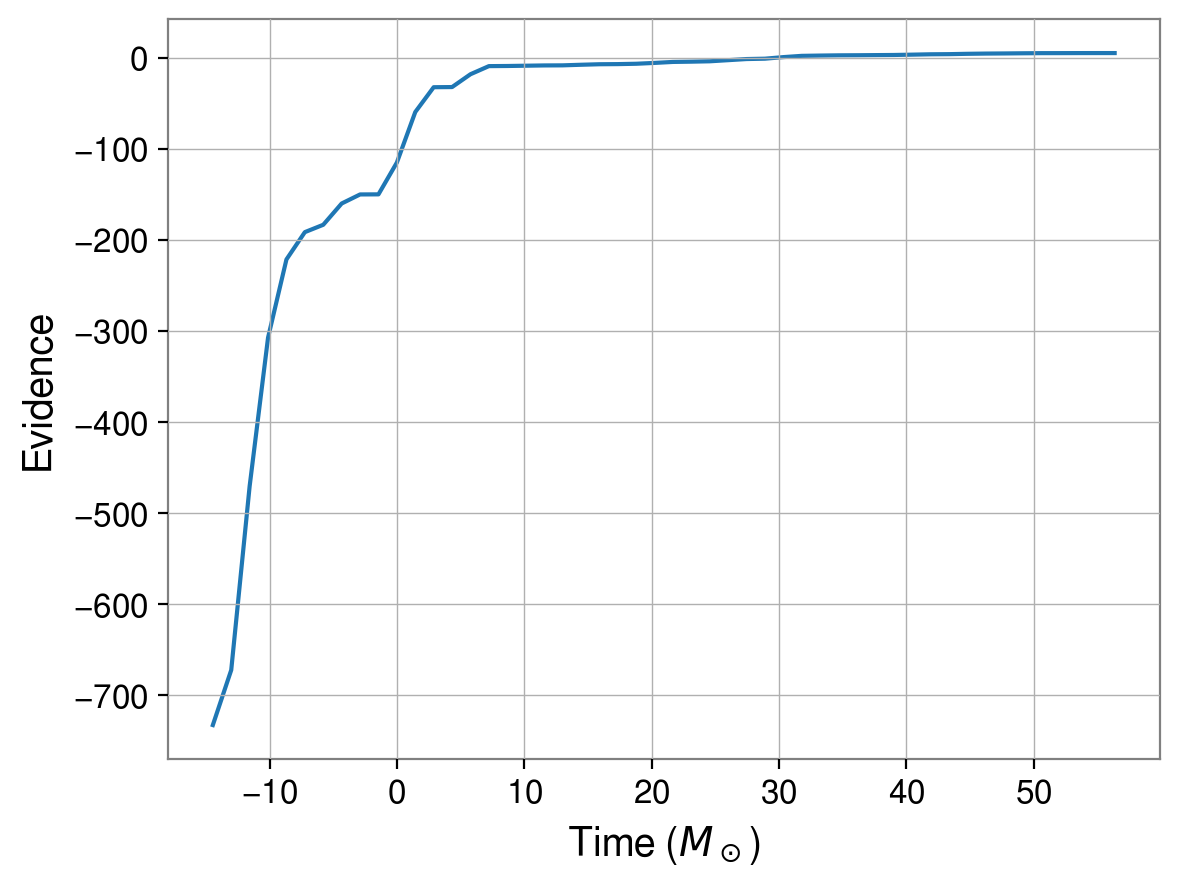

In [34]:
pl.plot(time220_221_440, evidence220_221_440, label = "220+221+440")
pl.xlabel(r'Time ($M_\odot$)')
pl.ylabel("Evidence")

## 220+221+330

In [35]:
data220_221_330 = np.loadtxt('./Cluster_results/combined_220+221+330.txt')
time220_221_330 = data220_221_330[:,0]
evidence220_221_330 = data220_221_330[:,1]
average_mass220_221_330 = data220_221_330[:,2]
average_chi220_221_330 = data220_221_330[:,3]
MAP_mass220_221_330 = data220_221_330[:,4]
MAP_chi220_221_330 = data220_221_330[:,5]

average_epsilon220_221_330 = epsilon_calc(average_mass220_221_330, average_chi220_221_330, theoretical_values[0], theoretical_values[1])
MAP_epsilon220_221_330 = epsilon_calc(MAP_mass220_221_330, MAP_chi220_221_330, theoretical_values[0], theoretical_values[1])

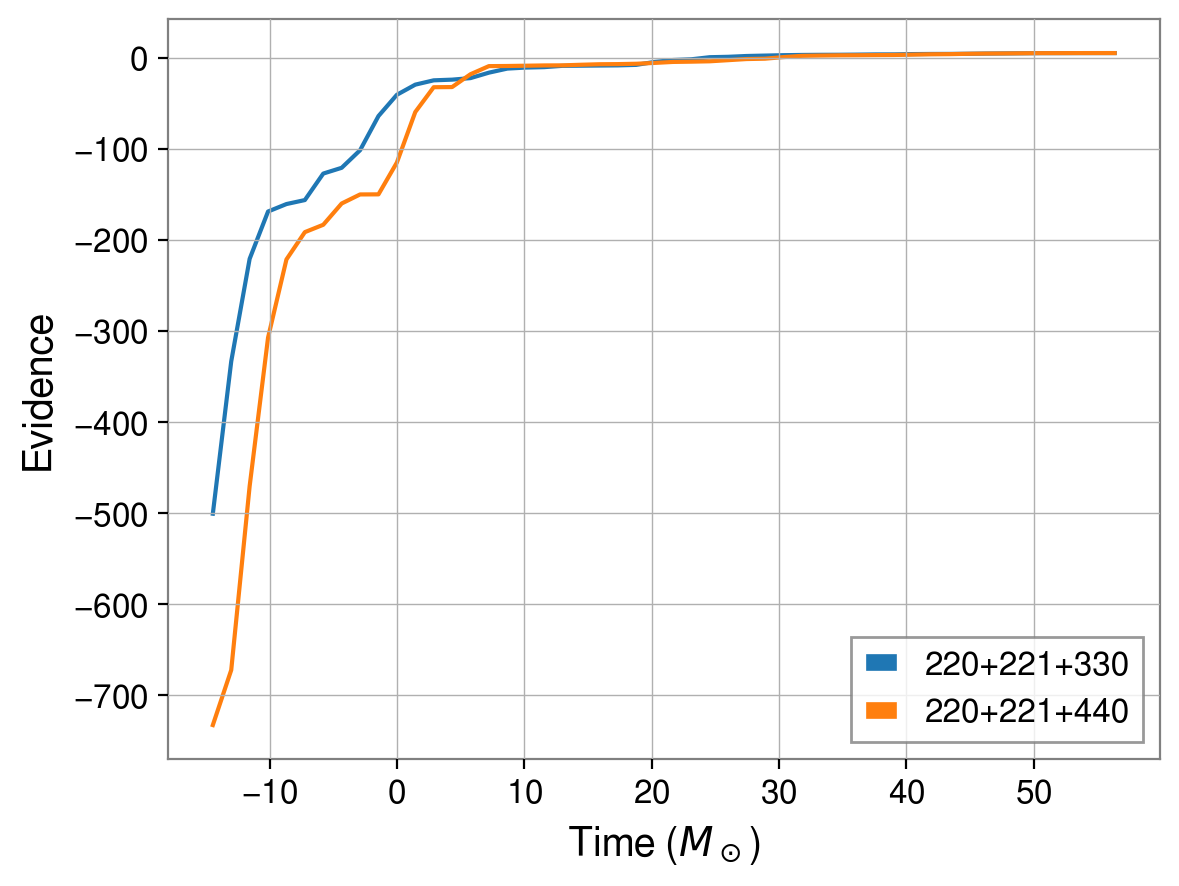

In [36]:
pl.plot(time220_221_330, evidence220_221_330, label = "220+221+330")
pl.plot(time220_221_330, evidence220_221_440, label = "220+221+440")
pl.xlabel(r'Time ($M_\odot$)')
pl.ylabel("Evidence")
pl.legend()

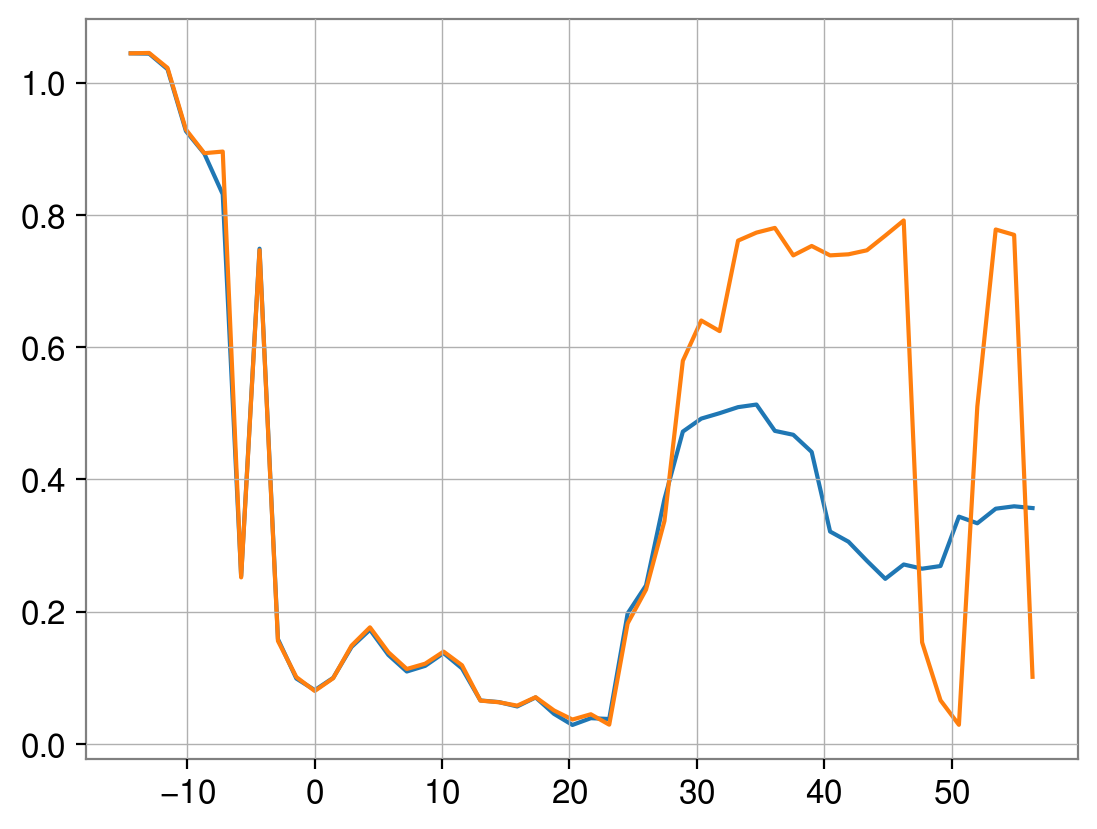

In [37]:
pl.plot(time220_221_330, average_epsilon220_221_330)
pl.plot(time220_221_330, MAP_epsilon220_221_330)

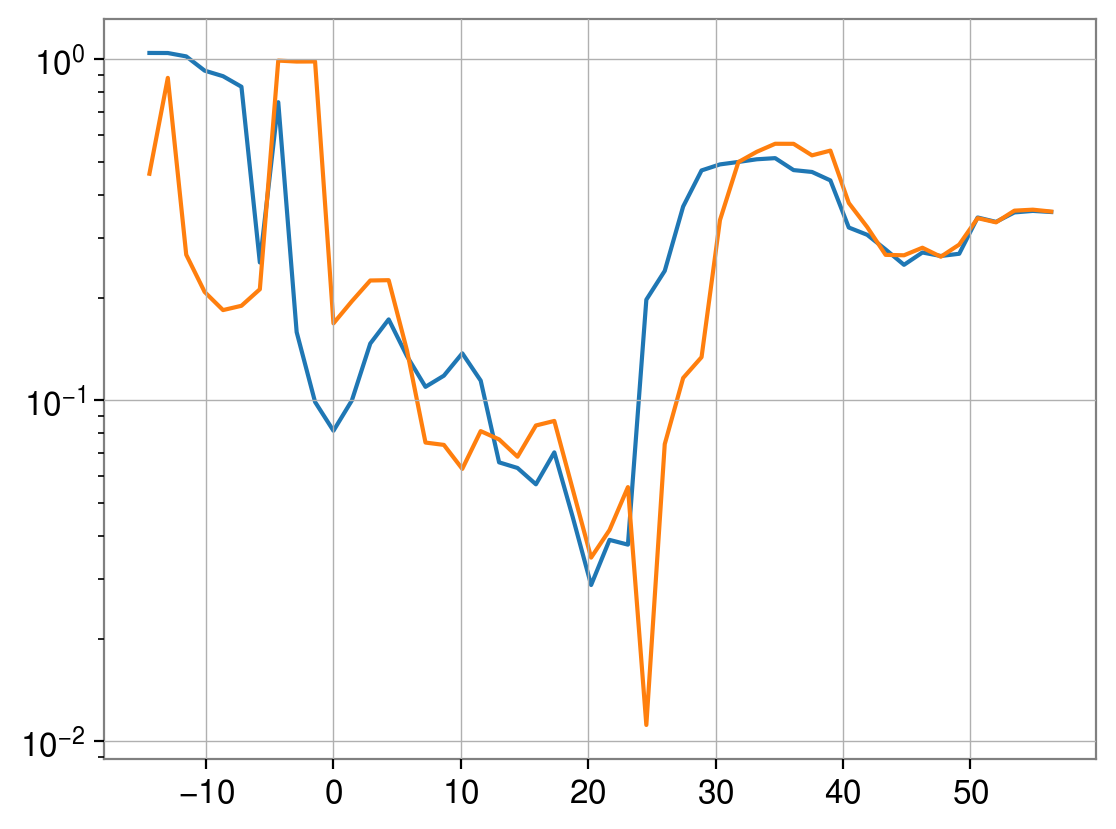

In [38]:
pl.semilogy(time220_221_330, average_epsilon220_221_330)
pl.semilogy(time220_221_330, average_epsilon220_221_440)

## 220+221+210+440

In [39]:
data220_221_210_440 = np.loadtxt('./Cluster_results/combined_220+221+210+440.txt')
time220_221_210_440 = data220_221_210_440[:,0]
evidence220_221_210_440 = data220_221_210_440[:,1]
average_mass220_221_210_440 = data220_221_210_440[:,2]
average_chi220_221_210_440 = data220_221_210_440[:,3]
MAP_mass220_221_210_440 = data220_221_210_440[:,4]
MAP_chi220_221_210_440 = data220_221_210_440[:,5]

average_epsilon220_221_210_440 = epsilon_calc(average_mass220_221_210_440, average_chi220_221_210_440, theoretical_values[0], theoretical_values[1])
MAP_epsilon220_221_210_440 = epsilon_calc(MAP_mass220_221_210_440, MAP_chi220_221_210_440, theoretical_values[0], theoretical_values[1])

## 220+221+210+440+330

In [40]:
data220_221_210_440_330 = np.loadtxt('./Cluster_results/combined_220+221+210+440+330.txt')
time220_221_210_440_330 = data220_221_210_440_330[:,0]
evidence220_221_210_440_330 = data220_221_210_440_330[:,1]
average_mass220_221_210_440_330 = data220_221_210_440_330[:,2]
average_chi220_221_210_440_330 = data220_221_210_440_330[:,3]
MAP_mass220_221_210_440_330 = data220_221_210_440_330[:,4]
MAP_chi220_221_210_440_330 = data220_221_210_440_330[:,5]

average_epsilon220_221_210_440_330 = epsilon_calc(average_mass220_221_210_440_330, average_chi220_221_210_440_330, theoretical_values[0], theoretical_values[1])
MAP_epsilon220_221_210_440_330 = epsilon_calc(MAP_mass220_221_210_440_330, MAP_chi220_221_210_440_330, theoretical_values[0], theoretical_values[1])

Text(0, 0.5, 'MAP $\\epsilon$')

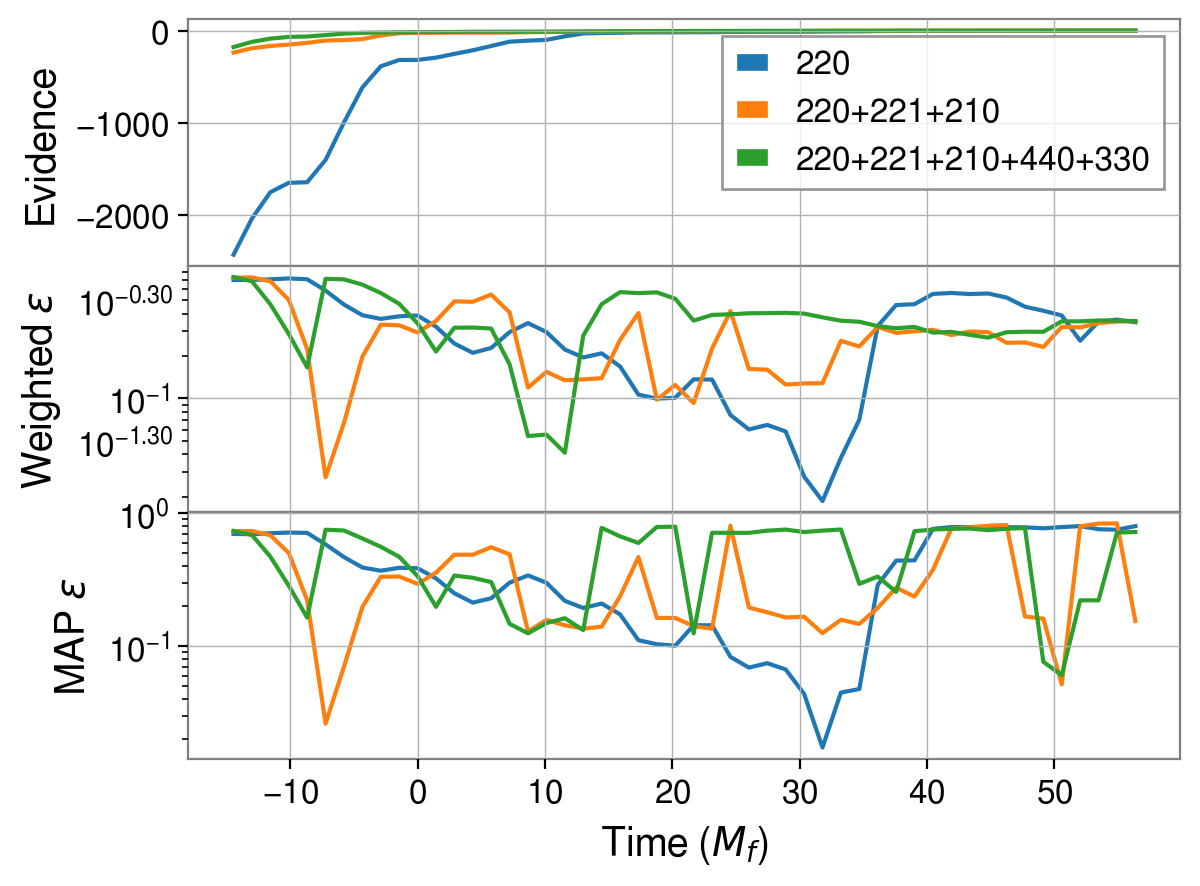

In [41]:
plt, axs = pl.subplots(3, sharex = True)
plt.subplots_adjust(hspace=0)

axs[0].plot(time220, evidence220, label = "220")
axs[0].plot(time220_221_210, evidence220_221_210, label = "220+221+210")
axs[0].plot(time220_221_210, evidence220_221_210_440_330, label = "220+221+210+440+330")
axs[0].set_ylabel("Evidence")
axs[0].legend()
# axs[0].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[0].axvline(t_intersect[1], c = 'r', ls = '--')
# axs[0].set_xlim(0, 40)

axs[1].semilogy(time220, average_epsilon220)
axs[1].semilogy(time220_221_210, average_epsilon220_221_210)
axs[1].semilogy(time220_221_210_440_330, average_epsilon220_221_210_440_330)
# axs[1].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[1].axvline(t_intersect[1], c = 'r', ls = '--')
axs[1].set_ylabel(r'Weighted $\epsilon$')

axs[2].semilogy(time220, MAP_epsilon220)
axs[2].semilogy(time220_221_210, MAP_epsilon220_221_210)
axs[2].semilogy(time220_221_210_440_330, MAP_epsilon220_221_210_440_330)
# axs[2].axvline(t_intersect[0], c = 'r', ls = '--')
# axs[2].axvline(t_intersect[1], c = 'r', ls = '--')
axs[2].set_xlabel(r'Time ($M_f$)')
axs[2].set_ylabel(r'MAP $\epsilon$')

## Plot

In [42]:
diff = (evidence220_221_440 - evidence220_221_330)>0
intersect = np.array([i[0] != i[1] for i in zip(diff, np.append(diff[1:], [False]))])

In [43]:
t_intersect = time220_221_440[intersect][0:2]

Text(0, 0.5, 'MAP $\\epsilon$')

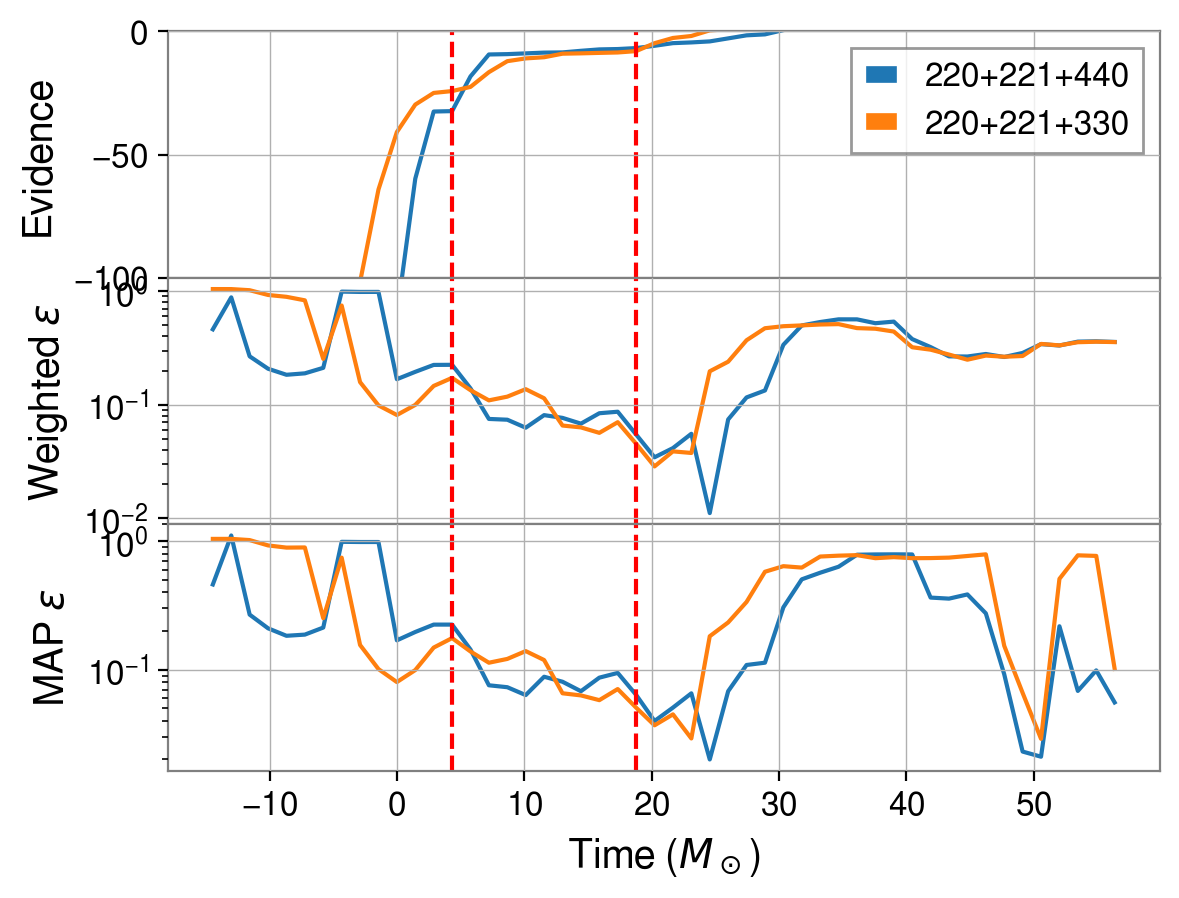

In [44]:
plt, axs = pl.subplots(3, sharex = True)
plt.subplots_adjust(hspace=0)

axs[0].plot(time220_221_440, evidence220_221_440, label = "220+221+440")
axs[0].plot(time220_221_330, evidence220_221_330, label = "220+221+330")
axs[0].set_ylabel("Evidence")
axs[0].legend()
axs[0].axvline(t_intersect[0], c = 'r', ls = '--')
axs[0].axvline(t_intersect[1], c = 'r', ls = '--')
axs[0].set_ylim(-100, 0)
# axs[0].set_xlim(0, 40)

axs[1].semilogy(time220_221_440, average_epsilon220_221_440)
axs[1].semilogy(time220_221_330, average_epsilon220_221_330)
axs[1].axvline(t_intersect[0], c = 'r', ls = '--')
axs[1].axvline(t_intersect[1], c = 'r', ls = '--')
axs[1].set_ylabel(r'Weighted $\epsilon$')

axs[2].semilogy(time220_221_440, MAP_epsilon220_221_440)
axs[2].semilogy(time220_221_330, MAP_epsilon220_221_330)
axs[2].axvline(t_intersect[0], c = 'r', ls = '--')
axs[2].axvline(t_intersect[1], c = 'r', ls = '--')
axs[2].set_xlabel(r'Time ($M_\odot$)')
axs[2].set_ylabel(r'MAP $\epsilon$')